# TP N° 1: Análisis Exploratorio de Datos
## Heart Diseases Dataset
Este conjunto de datos es una versión avanzada del clásico conjunto de datos de enfermedades cardíacas de UCI Machine Learning, enriquecido con más características para soportar análisis más sofisticados.

## 1- Listado de variables y selección 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import h5py
import PIL
import seaborn as sns
import plotly
import sklearn_pandas
import plotly.express as px

In [2]:
data = pd.read_csv('./heart_disease_data_with_features.csv')

In [3]:
data.shape
# Muestra las dimensiones del dataframe

(303, 36)

In [4]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,chol_trestbps_ratio,log_thalach_chol,symptom_zscore,avg_chol_by_age_group,thalach_chol_diff,symptom_severity_diff,age_chol_effect,thalach_risk_effect,age_trestbps_effect,chol_risk_ratio
0,63,1,1,145,233,1,2,150,0,2.3,...,1.595890,0.919704,-0.275764,260.024691,-83,-2.532099,14679,2419.350,9135,13.602662
1,67,1,4,160,286,0,2,108,1,1.5,...,1.776398,0.828936,0.568702,260.024691,-178,1.167901,19162,2242.296,10720,13.142174
2,67,1,4,120,229,0,2,129,1,2.6,...,1.892562,0.895083,1.572932,260.024691,-100,5.567901,15343,2134.047,8040,13.053640
3,37,1,3,130,250,0,0,187,0,3.5,...,1.908397,0.947695,1.595755,219.785714,-63,8.178571,9250,1972.850,4810,21.645022
4,41,0,2,130,204,0,2,172,0,1.4,...,1.557252,0.968116,-0.161647,235.847222,-32,0.783333,8364,1662.208,5330,19.129782
5,56,1,2,120,236,0,0,178,0,0.8,...,1.950413,0.948670,-0.435528,247.424000,-58,-2.034400,13216,2566.048,6720,15.308770
6,62,0,4,140,268,0,2,160,0,3.6,...,1.900709,0.908251,2.485868,260.024691,-108,9.567901,16616,2882.560,8680,14.093395
7,57,0,4,120,354,0,0,163,1,0.6,...,2.925620,0.868488,-0.252941,247.424000,-191,-1.234400,20178,3484.614,6840,15.819108
8,63,1,4,130,254,0,2,147,0,1.4,...,1.938931,0.901818,0.477408,260.024691,-107,0.767901,16002,2543.394,8190,13.878265
9,53,1,4,140,203,1,2,155,1,3.1,...,1.439716,0.949557,2.029400,247.424000,-48,8.765600,10759,1884.645,7420,15.426704


In [5]:
# Dividimos por las columnas de interes
subset = data.loc[:, ['sex','cp','fbs','restecg','thalach', 'exang','oldpeak','slope', 'ca','thal', 'num','age_group', 'cholesterol_level', 'bp_level','risk_score', 'symptom_severity', 'risk_factor', 'avg_chol_by_age_group']]
subset.describe()

,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,risk_score,symptom_severity,risk_factor,avg_chol_by_age_group
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000,303.000000,303.000000,301.000000,302.000000
mean,0.679868,3.158416,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294,14.844073,3.508251,19.733887,246.834437
std,0.467299,0.960126,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536,4.073047,4.381467,28.421998,10.493973
min,0.000000,1.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,7.216000,0.000000,0.000000,219.785714
25%,0.000000,3.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,12.080000,0.000000,0.000000,235.847222
50%,1.000000,3.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000,14.392000,1.800000,7.200000,247.424000
75%,1.000000,4.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000,17.181000,5.500000,28.800000,260.024691
max,1.000000,4.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000,38.938000,24.800000,173.600000,260.024691


In [6]:
subset.head(10)

,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,age_group,cholesterol_level,bp_level,risk_score,symptom_severity,risk_factor,avg_chol_by_age_group
0,1,1,1,2,150,0,2.3,3,0.0,6.0,0,60s,normal,high,16.129,2.3,13.8,260.024691
1,1,4,0,2,108,1,1.5,2,3.0,3.0,2,60s,high,high,20.762,6.0,18.0,260.024691
2,1,4,0,2,129,1,2.6,2,2.0,7.0,1,60s,normal,low,16.543,10.4,72.8,260.024691
3,1,3,0,0,187,0,3.5,3,0.0,3.0,0,30s,high,normal,10.550,10.5,31.5,219.785714
4,0,2,0,2,172,0,1.4,1,0.0,3.0,0,40s,normal,normal,9.664,2.8,8.4,235.847222
5,1,2,0,0,178,0,0.8,1,0.0,3.0,0,50s,normal,low,14.416,1.6,4.8,247.424000
6,0,4,0,2,160,0,3.6,3,2.0,3.0,3,60s,high,normal,18.016,14.4,43.2,260.024691
7,0,4,0,0,163,1,0.6,1,0.0,3.0,0,50s,high,low,21.378,2.4,7.2,247.424000
8,1,4,0,2,147,0,1.4,2,1.0,7.0,2,60s,high,normal,17.302,5.6,39.2,260.024691
9,1,4,1,2,155,1,3.1,3,0.0,7.0,1,50s,normal,normal,12.159,12.4,86.8,247.424000


In [7]:
# Mostramos los tipos de datos
subset.dtypes

sex                        int64
cp                         int64
fbs                        int64
restecg                    int64
thalach                    int64
exang                      int64
oldpeak                  float64
slope                      int64
ca                       float64
thal                     float64
num                        int64
age_group                 object
cholesterol_level         object
bp_level                  object
risk_score               float64
symptom_severity         float64
risk_factor              float64
avg_chol_by_age_group    float64
dtype: object

In [8]:
# Elije 10 filas al azar del DataFrame
subset.sample(10)

,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,age_group,cholesterol_level,bp_level,risk_score,symptom_severity,risk_factor,avg_chol_by_age_group
215,1,1,0,2,162,0,1.9,2,0.0,7.0,0,50s,low,low,12.008,1.9,13.3,247.424000
199,1,1,0,2,125,0,0.0,1,0.0,3.0,1,50s,high,high,17.707,0.0,0.0,247.424000
117,0,4,0,0,182,0,1.4,1,0.0,3.0,0,30s,low,normal,7.785,5.6,16.8,219.785714
227,0,3,0,0,172,0,0.0,1,1.0,3.0,0,60s,high,high,20.079,0.0,0.0,260.024691
181,0,4,0,2,150,1,1.9,2,2.0,7.0,2,50s,high,normal,24.244,7.6,53.2,247.424000
77,0,3,0,2,142,0,1.5,1,1.0,3.0,0,50s,high,normal,17.108,4.5,13.5,247.424000
170,1,3,0,0,112,1,2.9,2,1.0,7.0,3,70s,high,high,20.430,8.7,60.9,249.600000
1,1,4,0,2,108,1,1.5,2,3.0,3.0,2,60s,high,high,20.762,6.0,18.0,260.024691
213,0,4,1,0,165,1,1.0,2,2.0,7.0,3,60s,normal,high,16.828,4.0,28.0,260.024691
100,1,4,0,2,185,0,0.0,1,0.0,3.0,0,40s,high,low,12.850,0.0,0.0,235.847222


In [9]:
fig = px.box(subset, y='thalach', )
fig.show()

Analizando la variable "thalach" podemos ver que uno de los registros que tiene es atípico. Este registro va a ser eliminado porque puede perjudicar el modelo. 

In [10]:
result = subset[subset['thalach'] == 71]
result.head()

,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,age_group,cholesterol_level,bp_level,risk_score,symptom_severity,risk_factor,avg_chol_by_age_group
245,1,4,0,0,71,0,1.0,2,0.0,3.0,2,60s,normal,low,17.079,4.0,12.0,260.024691


In [11]:
subset = subset.drop(index=245)

In [12]:
fig = px.box(subset, y='thalach', )
fig.show()

Con el gráfico en barras podemos deducir que en la mayoria de datos del subconjunto es 0, es decir, que no se detectaron enfermedades. Y luego la cantidad de casos donde se empieza a detectar enfermedades se encuentran escalonadas, yendo desde el 1 (enfermedad leve) hasta 4 (enfermedad grave).

## 2- Análisis detallado de un conjunto de variables

### Variables Nulos
Estos son los valores nulos encontrados en el subset de datos:

In [13]:
subset.isnull().sum()

sex                      0
cp                       0
fbs                      0
restecg                  0
thalach                  0
exang                    0
oldpeak                  0
slope                    0
ca                       4
thal                     2
num                      0
age_group                1
cholesterol_level        1
bp_level                 2
risk_score               0
symptom_severity         0
risk_factor              2
avg_chol_by_age_group    1
dtype: int64

#### Tratamiento de valores nulos

**Variables:**
- **ca: numerica**
- **thal: numerica**
- **age_group: cualitativa**
- **cholesterol_level: cualitativa**
- **bp_level: cualitativa**
- **risk_factor: numerica**
- **avg_chol_by_age_group: numerica**

Para las variables numericas, el tratamiento que llevaremos a cabo sera rellenar con la media
Para las variables cualitativas, el tratamiento será rellenar con el valor que mas se repite

#### tratamiento de valores nulos de 'ca'

In [14]:
subset['ca'] = subset['ca'].fillna(subset['ca'].mean())
subset['ca'].isnull().sum()

0

#### tratamiento de valores nulos de 'thal'

In [15]:
subset[subset['thal'].isna()]

,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,age_group,cholesterol_level,bp_level,risk_score,symptom_severity,risk_factor,avg_chol_by_age_group
87,0,3,0,2,115,0,0.0,1,0.0,NaN,0,50s,normal,normal,12.728,0.0,NaN,247.424
266,1,4,1,0,156,1,1.0,2,0.0,NaN,2,50s,normal,normal,11.888,4.0,NaN,247.424


In [16]:
subset['thal'] = subset['thal'].fillna(subset['thal'].mean())
subset['thal'].isnull().sum()

0

#### tratamiento de valores nulos de 'age_group'

In [17]:
subset['age_group'] = subset['age_group'].fillna(subset['age_group'].mode()[0])
subset['age_group'].isnull().sum()

0

#### tratamiento de valores nulos de 'cholesterol level'

In [18]:
subset['cholesterol_level'] = subset['cholesterol_level'].fillna(subset['cholesterol_level'].mode()[0])
subset['cholesterol_level'].isnull().sum()

0

#### tratamiento de valores nulos de 'bp_level'

In [19]:
subset['bp_level'] = subset['bp_level'].fillna(subset['bp_level'].mode()[0])
subset['bp_level'].isnull().sum()

0

#### tratamiento de valores nulos de 'risk_factor'

In [20]:
subset['risk_factor'] = subset['risk_factor'].fillna(subset['risk_factor'].mean())
subset['risk_factor'].isnull().sum()

0

#### tratamiento de valores nulos de 'avg_chol_by_age_group'

In [21]:
subset['avg_chol_by_age_group'] = subset['avg_chol_by_age_group'].fillna(subset['avg_chol_by_age_group'].mean())
subset['avg_chol_by_age_group'].isnull().sum()

0

In [22]:
# ESTO PUEDE JUNTARSE EN DOS CELDAS, UNA CON LAS NUMERICAS Y OTRA CON LAS CUALITATIVAS

### Variable de salida
**num** 

<Axes: title={'center': 'num'}, xlabel='num'>

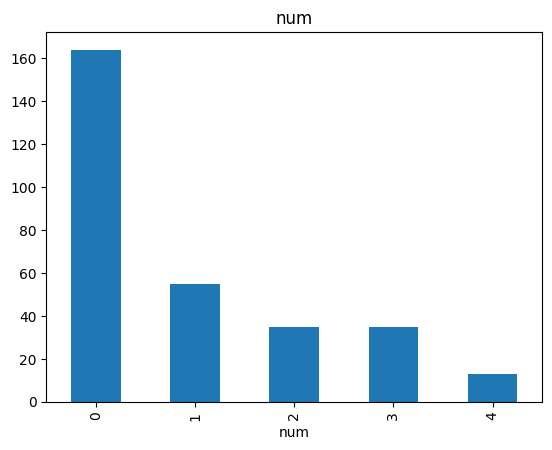

In [23]:
subset.num.value_counts().plot.bar(title='num')

In [24]:
subset.num.value_counts()

num
0    164
1     55
2     35
3     35
4     13
Name: count, dtype: int64

In [25]:
len(subset)

302

Podemos observar en el grafico que de la variable **num** se encuentra dividida en los siguientes porcentajes:
- **0 - 55,21%**
- **1 - 18.51%**
- **2 - 11.78%**
- **3 - 11.78%**
- **4 - 4.37%**

Esto nos indica que el 55% de las personas no se detectaron enfermedades cardiacas, y el resto, el 45% indica que hay enfermedad cardiaca entre sus diferentes gravedades. Esto nos muestra que hay una tendencia en la cual mientras más grave sea la enfermedad cardiaca, menor es la cantidad de personas hay.

### Variables de entrada

Para trabajar de una manera mas entendible en el trabajo decidimos renombrar las mismas.

In [26]:
BETTER_COLUMN_NAMES = {
    'sex': 'sex',
    'cp': 'chest_pain',
    'fbs':'fasting_blood_sugar',
    'restecg':'rest_ecg',
    'thalach':'max_heart_rate',
    'exang':'exercise_induced_angina',
    'oldpeak':'depression_induced_ex',
    'slope':'slope',
    'ca':'vessels_colored_fl',
    'thal':'thalassemia',
    'num':'diagnosis',
    'age_group':'age_group',
    'cholesterol_level':'cholesterol_level',
    'bp_level':'blood_pressure_level',
    'risk_score':'risk_score',
    'symptom_severity':'symptom_severity',
    'risk_factor':'risk_factor',
    'avg_chol_by_age_group':'avg_chol_by_age_group'
}

subset.rename(columns=BETTER_COLUMN_NAMES, inplace=True)

subset

,sex,chest_pain,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,depression_induced_ex,slope,vessels_colored_fl,thalassemia,diagnosis,age_group,cholesterol_level,blood_pressure_level,risk_score,symptom_severity,risk_factor,avg_chol_by_age_group
0,1,1,1,2,150,0,2.3,3,0.000000,6.0,0,60s,normal,high,16.129,2.3,13.8,260.024691
1,1,4,0,2,108,1,1.5,2,3.000000,3.0,2,60s,high,high,20.762,6.0,18.0,260.024691
2,1,4,0,2,129,1,2.6,2,2.000000,7.0,1,60s,normal,low,16.543,10.4,72.8,260.024691
3,1,3,0,0,187,0,3.5,3,0.000000,3.0,0,30s,high,normal,10.550,10.5,31.5,219.785714
4,0,2,0,2,172,0,1.4,1,0.000000,3.0,0,40s,normal,normal,9.664,2.8,8.4,235.847222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,1,0,0,132,0,1.2,2,0.000000,7.0,1,40s,high,low,12.980,1.2,8.4,235.847222
299,1,4,1,0,141,0,3.4,2,2.000000,7.0,2,60s,low,high,14.564,13.6,95.2,260.024691
300,1,4,0,0,115,1,1.2,2,1.000000,7.0,3,50s,low,normal,8.767,4.8,33.6,247.424000
301,0,2,0,2,174,0,0.0,2,1.000000,3.0,1,50s,normal,normal,14.752,0.0,0.0,247.424000


**sex**

In [27]:
subset.sex.value_counts()

sex
1    205
0     97
Name: count, dtype: int64

<Axes: title={'center': 'Sex (1: Hombre 0: Mujer)'}, xlabel='sex'>

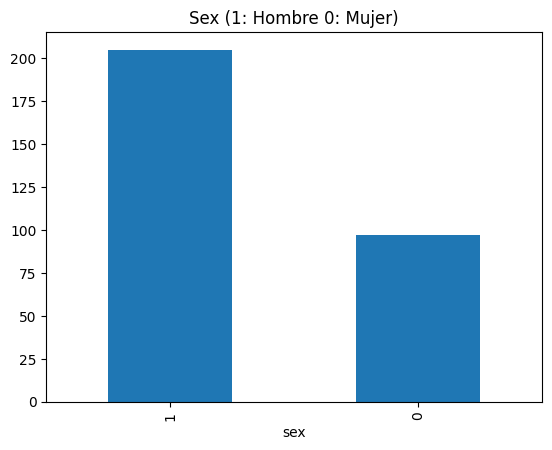

In [28]:
subset.sex.value_counts().plot.bar(title='Sex (1: Hombre 0: Mujer)')

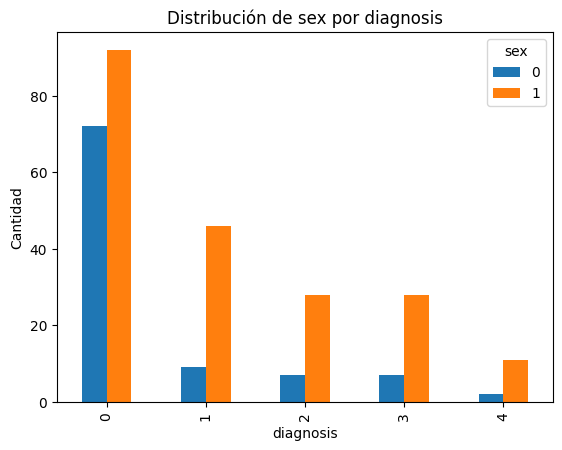

In [29]:
grouped_data = subset.groupby(['diagnosis', 'sex']).size().unstack(fill_value=0)
grouped_data.plot(kind='bar', title='Distribución de sex por diagnosis')

plt.xlabel('diagnosis')
plt.ylabel('Cantidad')
plt.show()

Se puede observar que el hombre (1) tiene una mayor probabilidad de contraer alguna enfermedad cardiaca que las mujeres (0). También hay que considerar que los registros de **sex** se encuentra desbalaceados, siendo la cantidad de hombres en los registros de un **69.02%** y de las mujeres el **32.65%**, por lo que es evidente que el gráfico indique que los hombres son más propensos a contraer una enfermedad cardiaca. 

**Depression_induced_ex**

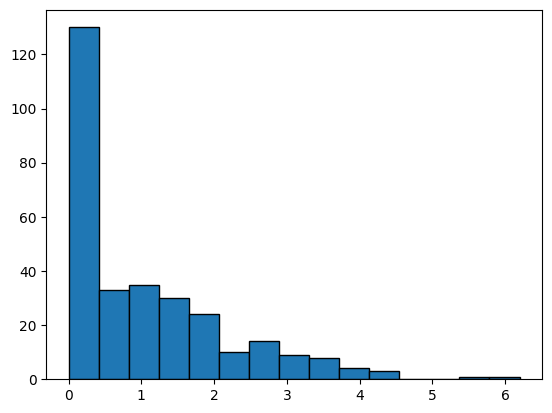

In [30]:
plt.hist(subset.depression_induced_ex, bins=15, edgecolor='black')
plt.show()

In [31]:
fig = px.box(subset, y='depression_induced_ex')
fig.show()

Podemos observar en el gráfico en caja que hay valores aberrantes, por lo que procedemos a eliminarlos del subset de datos con el que estamos trabajando para evitar problemas futuros en el modelado. 

In [32]:
subset = subset[subset['depression_induced_ex'] <= 4]

In [33]:
fig = px.box(subset, y='depression_induced_ex')
fig.show()

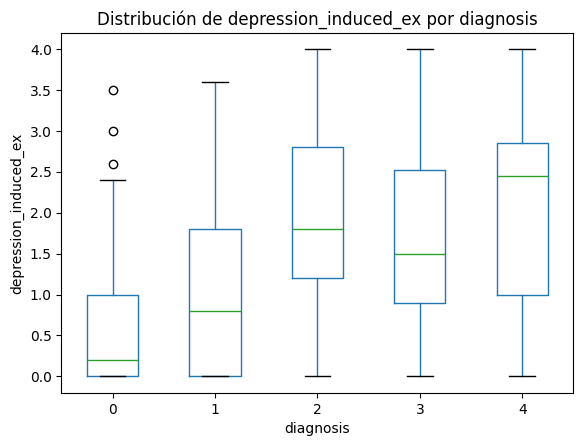

In [34]:
subset.boxplot(column='depression_induced_ex', by='diagnosis', grid=False)

plt.title('Distribución de depression_induced_ex por diagnosis')
plt.suptitle('')  
plt.xlabel('diagnosis')
plt.ylabel('depression_induced_ex')
plt.show() 

#### Grupo Etáreo

<Axes: title={'center': 'Grupo etario'}, xlabel='age_group'>

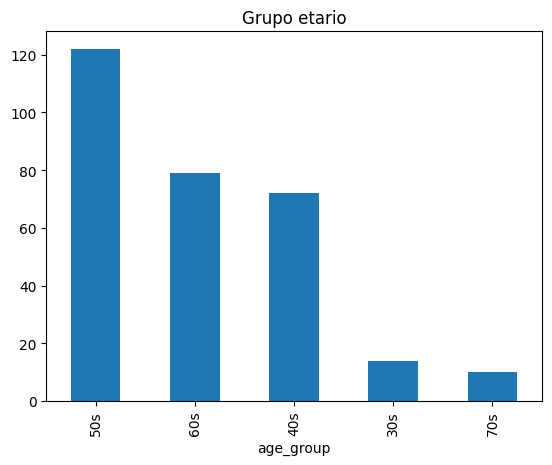

In [35]:
subset.age_group.value_counts().plot.bar(title='Grupo etario', )

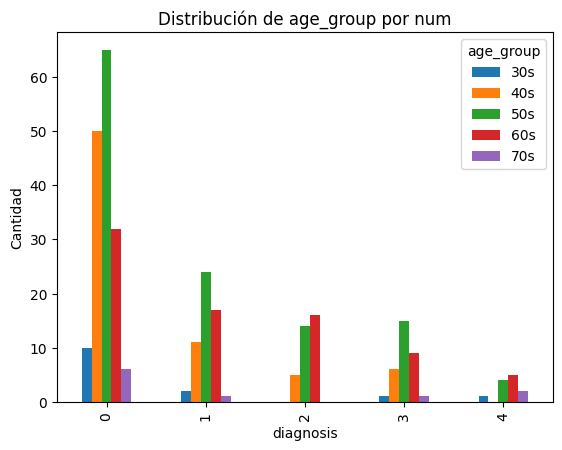

In [36]:
grouped_data = subset.groupby(['diagnosis', 'age_group']).size().unstack(fill_value=0)
grouped_data.plot(kind='bar', title='Distribución de age_group por num')

plt.xlabel('diagnosis')
plt.ylabel('Cantidad')
plt.show()

In [37]:
subset.age_group.value_counts()

age_group
50s    122
60s     79
40s     72
30s     14
70s     10
Name: count, dtype: int64

A simple vista observamos que el grupo etáreo de los **50s** es aquel que más destaca entre los diferentes valores de diagnosis, al igual que aquel grupo que se encuentra entre los **60s**.

**Porcentajes**
- **30s - 4.71%**
- **40s - 24.24%**
- **50s - 41.07%**
- **60s - 26.59%**
- **70s - 3.36%**

Con estos porcentajes observamos que los registros de las edades etarias se encuentra desbalanceados, siendo el grupo etáreo de 50s con el mayor porcentaje. 

#### cp - Tipo de dolor de pecho

<Axes: title={'center': 'Tipo de dolor de pecho'}, xlabel='chest_pain'>

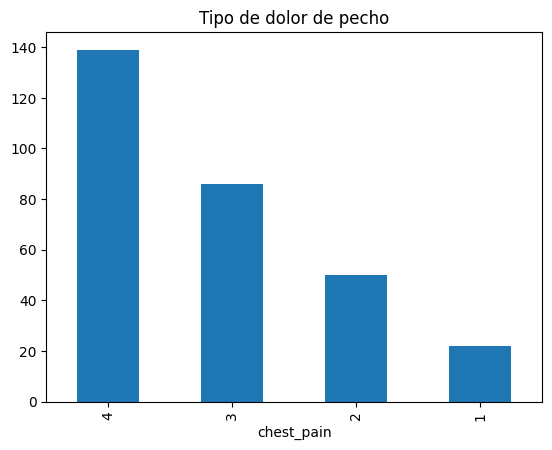

In [38]:
subset.chest_pain.value_counts().plot.bar(title='Tipo de dolor de pecho')

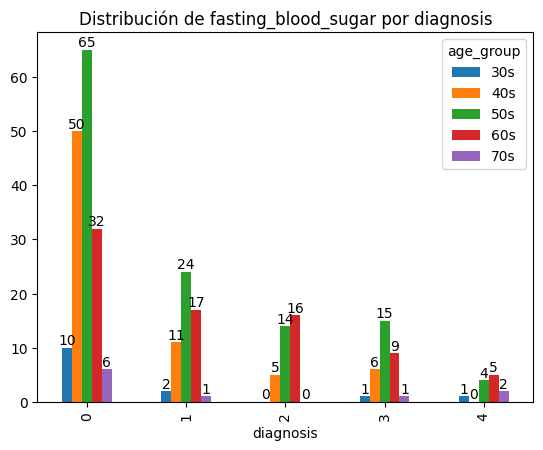

In [39]:
graph = grouped_data.plot(kind='bar', title='Distribución de fasting_blood_sugar por diagnosis')

## SI TENES la variable graph, no copies lo de arriba, solo lo de abajo

for container in graph.containers:
    graph.bar_label(container, label_type='edge')

In [40]:
subset.chest_pain.value_counts()

chest_pain
4    139
3     86
2     50
1     22
Name: count, dtype: int64

A simple vista se puede observar que no importa el tipo de dolor de pecho para poder deducir si hay alguna enfermedad cardiaca. Se ve en el gráfico que aquellos pacientes asintomáticos (4) se encuentran distribuidos entre todas las variables del diagnosis. 

**Porcentaje de chest_pain**
- **4 - 46.80%**
- **3 - 28.95%**
- **2 - 16.83%**
- **1 - 7.40%**

#### fbs - Azúcar en sangre en ayunas > 120 mg/dl

<Axes: title={'center': 'Azúcar en sangre > 120ml/dl'}, xlabel='fasting_blood_sugar'>

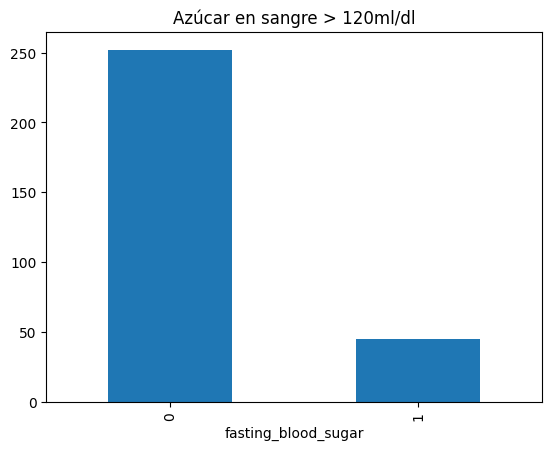

In [41]:
subset.fasting_blood_sugar.value_counts().plot.bar(title='Azúcar en sangre > 120ml/dl')

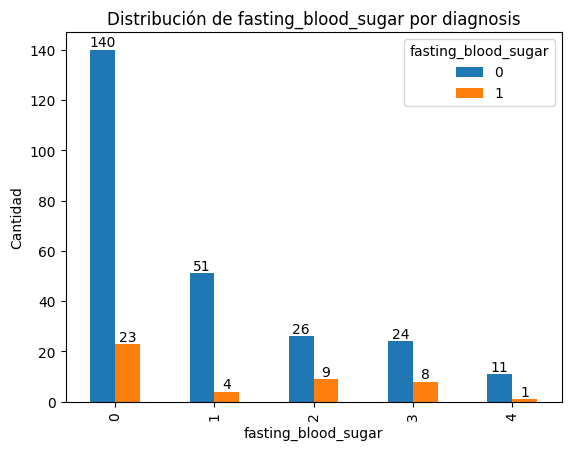

In [42]:
grouped_data = subset.groupby(['diagnosis', 'fasting_blood_sugar']).size().unstack(fill_value=0)
graph = grouped_data.plot(kind='bar', title='Distribución de fasting_blood_sugar por diagnosis')

for container in graph.containers:
    graph.bar_label(container, label_type='edge')

plt.xlabel('fasting_blood_sugar')
plt.ylabel('Cantidad')
plt.show()

In [43]:
subset.fasting_blood_sugar.value_counts()

fasting_blood_sugar
0    252
1     45
Name: count, dtype: int64

#### restecg

<Axes: title={'center': 'rest_ecg'}, xlabel='rest_ecg'>

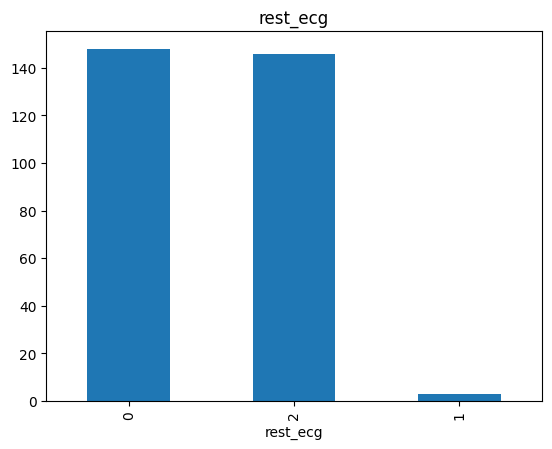

In [44]:
subset.rest_ecg.value_counts().plot.bar(title='rest_ecg')

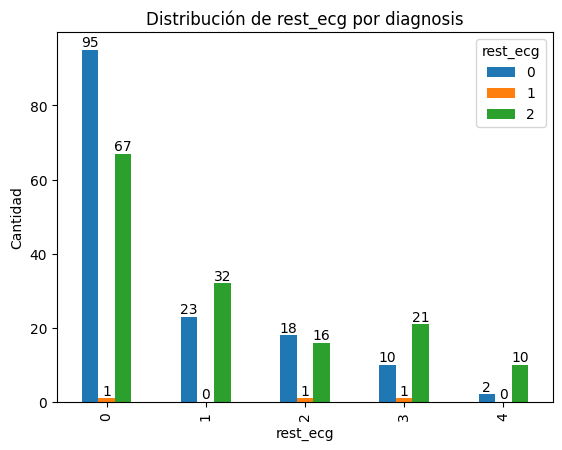

In [45]:
grouped_data = subset.groupby(['diagnosis', 'rest_ecg']).size().unstack(fill_value=0)
graph = grouped_data.plot(kind='bar', title='Distribución de rest_ecg por diagnosis')

for container in graph.containers:
    graph.bar_label(container, label_type='edge')

plt.xlabel('rest_ecg')
plt.ylabel('Cantidad')
plt.show()

Se observa que aumenta la gravedad de la enfermedad cardiaca (diagnosis) es mayor la hipertrofia ventricular izquierda probable o definitiva (rest_ecg - 2), esto nos dice que es más proble de contraer una enfermedad cardiaca grave. 

#### exang - angina inducida por el ejercicio

<Axes: title={'center': 'exang'}, xlabel='exercise_induced_angina'>

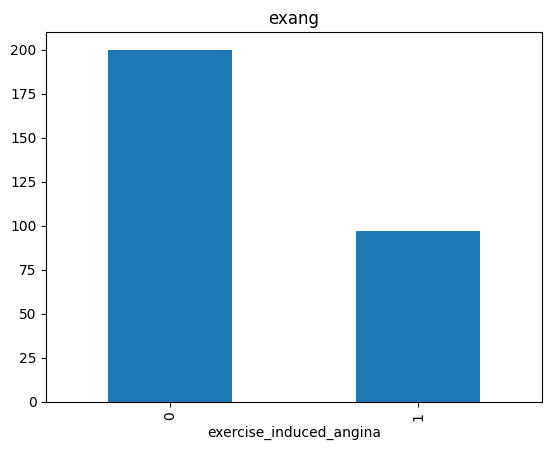

In [46]:
subset.exercise_induced_angina.value_counts().plot.bar(title='exang')

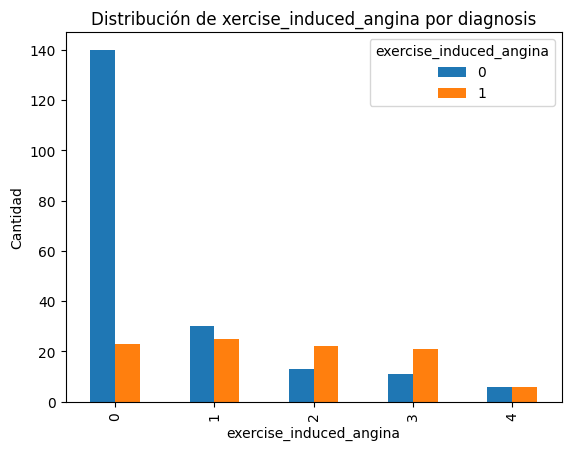

In [47]:
grouped_data = subset.groupby(['diagnosis', 'exercise_induced_angina']).size().unstack(fill_value=0)
grapf = grouped_data.plot(kind='bar', title='Distribución de xercise_induced_angina por diagnosis')

for container in graph.containers:
    graph.bar_label(container, label_type='edge')

plt.xlabel('exercise_induced_angina')
plt.ylabel('Cantidad')
plt.show()

#### slope

<Axes: title={'center': 'slope'}, xlabel='slope'>

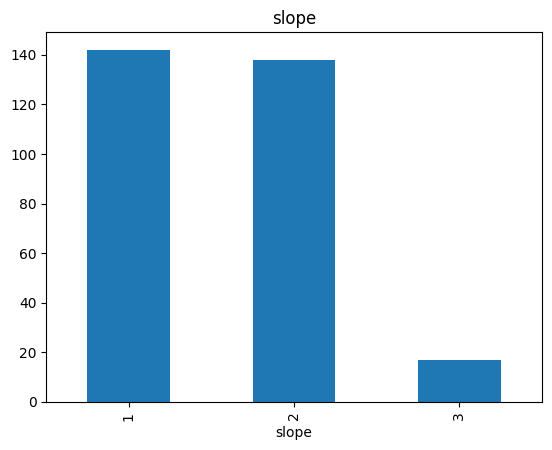

In [48]:
subset.slope.value_counts().plot.bar(title='slope')

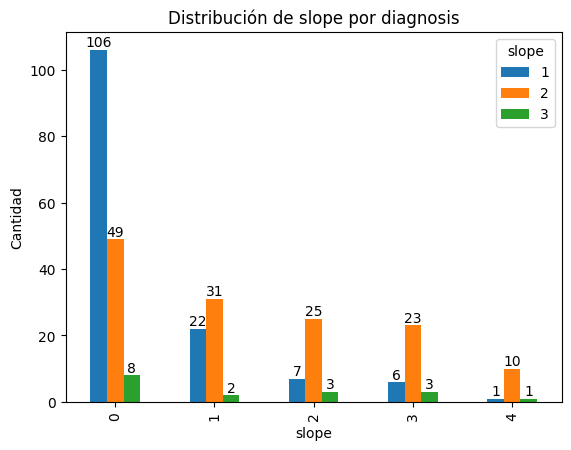

In [49]:
grouped_data = subset.groupby(['diagnosis', 'slope']).size().unstack(fill_value=0)
graph = grouped_data.plot(kind='bar', title='Distribución de slope por diagnosis')

for container in graph.containers:
    graph.bar_label(container, label_type='edge')

plt.xlabel('slope')
plt.ylabel('Cantidad')
plt.show()

El ST ascendente (valor 1 del **slope**) es el valor menos procupante a la hora de tener que indicar alguna enfermedad cardiaca por lo que corresponde con lo que nos indica el gráfico, y a medica que aumenta la posibilidad de tener una enfermedad cardiaca, este valor disminuye y se muestra predominante el valor de ST plano (valor 2 de **slope**). 

#### Vessels colored fl

In [50]:
subset.vessels_colored_fl.sample(10)

88     0.0
202    1.0
108    1.0
116    0.0
87     0.0
214    1.0
56     1.0
4      0.0
100    0.0
84     0.0
Name: vessels_colored_fl, dtype: float64

Aca tenemos un problema, el tipo de variable de 'vessels_colored_fl' es float, pero los datos adentro son todos enteros, asi que seran transformados en int.

In [51]:
subset['vessels_colored_fl'] = subset['vessels_colored_fl'].astype(int)

C:\Users\ignac\AppData\Local\Temp\ipykernel_17520\2717628392.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='vessels_colored_fl'>

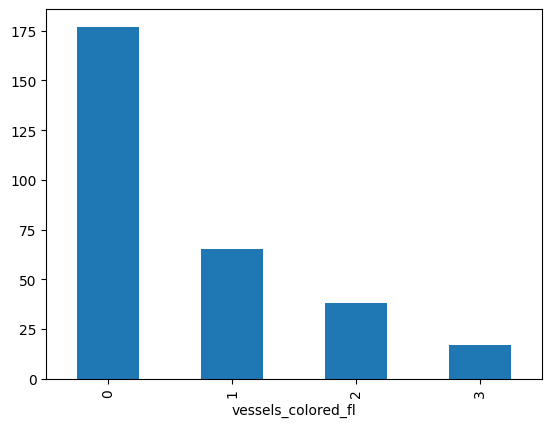

In [52]:
subset.vessels_colored_fl.value_counts().plot.bar()

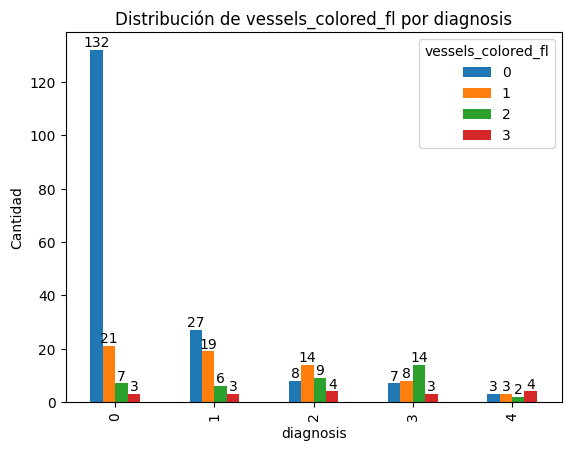

In [53]:
grouped_data = subset.groupby(['diagnosis', 'vessels_colored_fl']).size().unstack(fill_value=0)
graph = grouped_data.plot(kind='bar', title='Distribución de vessels_colored_fl por diagnosis')

for container in graph.containers:
    graph.bar_label(container, label_type='edge')

plt.xlabel('diagnosis')
plt.ylabel('Cantidad')
plt.show()

Se evidencia que aquellos que no poseen enfermedad cardiaca, son aquellos que no poseen vasos principales bloqueados. Por lo que a medida que aumenta la gravedad de la enfermedad cardiaca, disminuye. 

#### Thalassemia

Los valores de "thalassemia" son enteros, solo que en el dataframe se encuentran almacenados como float, entonces a la hora de realizar el gráfico aparecen un par de errores. 

In [54]:
subset["thalassemia"] = subset["thalassemia"].astype(int)

C:\Users\ignac\AppData\Local\Temp\ipykernel_17520\4083446175.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



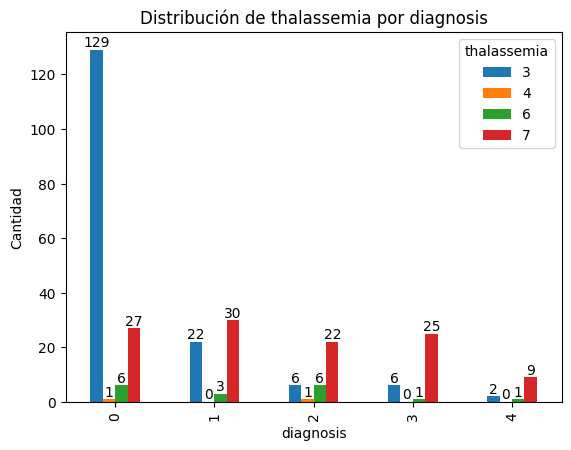

In [55]:
grouped_data = subset.groupby(['diagnosis', 'thalassemia']).size().unstack(fill_value=0)
graph = grouped_data.plot(kind='bar', title='Distribución de thalassemia por diagnosis')

for container in graph.containers:
    graph.bar_label(container, label_type='edge')

plt.xlabel('diagnosis')
plt.ylabel('Cantidad')
plt.show()

#### Max_heart_rate

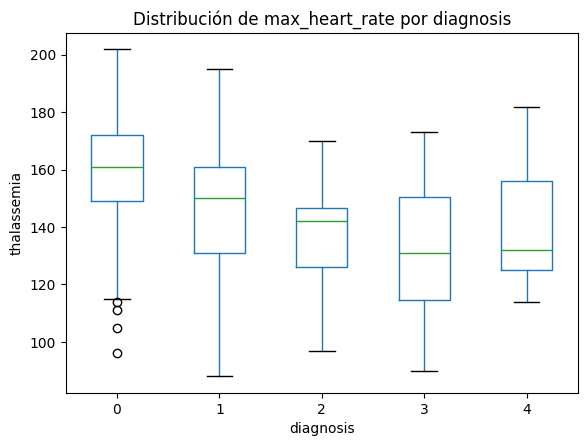

In [56]:
subset.boxplot(column='max_heart_rate', by='diagnosis', grid=False)

plt.title('Distribución de max_heart_rate por diagnosis')
plt.suptitle('')
plt.xlabel('diagnosis')
plt.ylabel('thalassemia')
plt.show()

#### Cholesterol_level

<Axes: xlabel='cholesterol_level'>

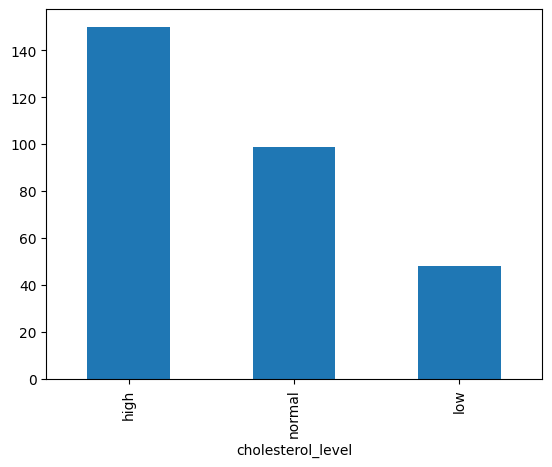

In [57]:
subset.cholesterol_level.value_counts().plot.bar()

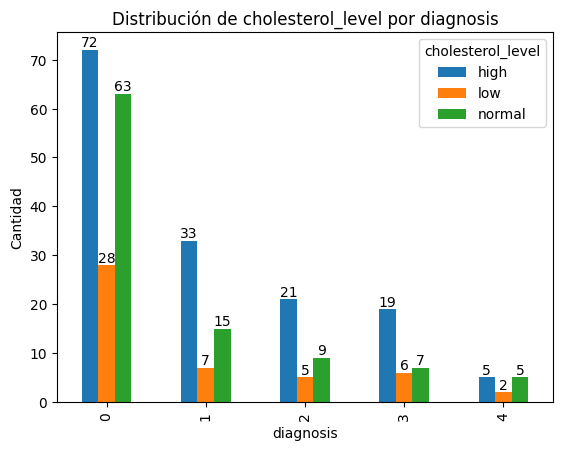

In [58]:
grouped_data = subset.groupby(['diagnosis', 'cholesterol_level']).size().unstack(fill_value=0)
graph = grouped_data.plot(kind='bar', title='Distribución de cholesterol_level por diagnosis')

for container in graph.containers:
    graph.bar_label(container, label_type='edge')

plt.xlabel('diagnosis')
plt.ylabel('Cantidad')
plt.show()

#### Blood_pressure_level

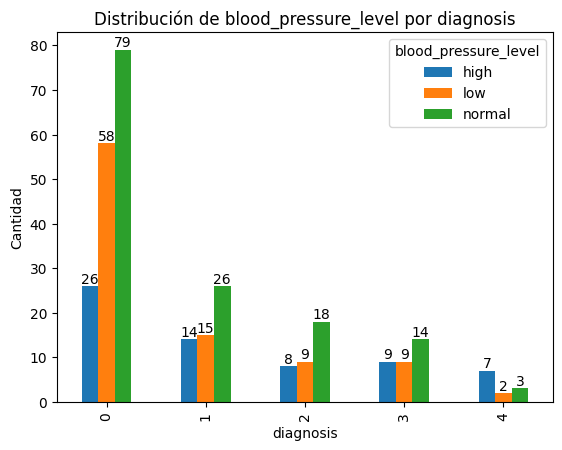

In [59]:
grouped_data = subset.groupby(['diagnosis', 'blood_pressure_level']).size().unstack(fill_value=0)
graph = grouped_data.plot(kind='bar', title='Distribución de blood_pressure_level por diagnosis')

for container in graph.containers:
    graph.bar_label(container, label_type='edge')

plt.xlabel('diagnosis')
plt.ylabel('Cantidad')
plt.show()

#### Risk_score

In [60]:
fig = px.box(subset, y='risk_score')
fig.show()

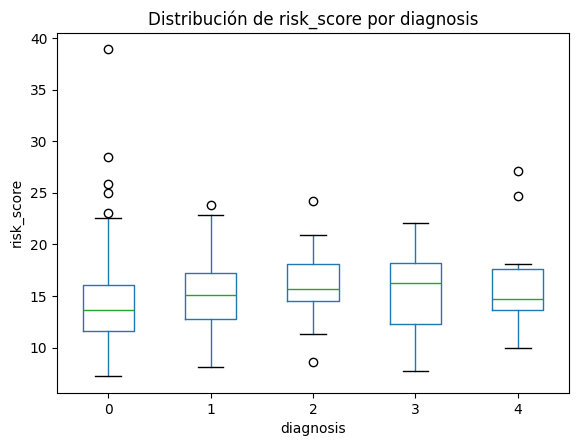

In [61]:
bxp = subset.boxplot(column='risk_score', by='diagnosis', grid=False)

plt.title('Distribución de risk_score por diagnosis')
plt.suptitle('')
plt.xlabel('diagnosis')
plt.ylabel('risk_score')
plt.show()

#### Risk_factor

In [62]:
fig = px.box(subset, y='risk_factor')
fig.show()

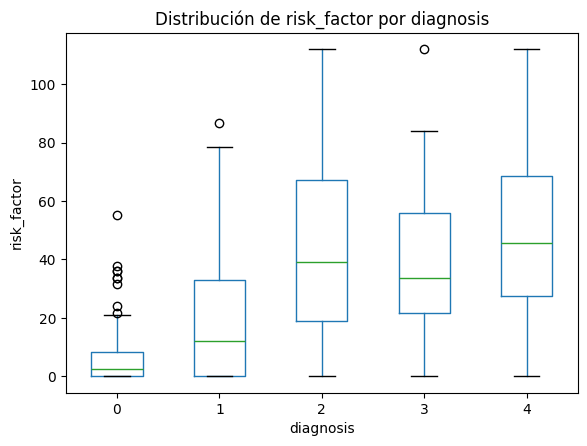

In [63]:
bxp = subset.boxplot(column='risk_factor', by='diagnosis', grid=False)

plt.title('Distribución de risk_factor por diagnosis')
plt.suptitle('')
plt.xlabel('diagnosis')
plt.ylabel('risk_factor')
plt.show()

#### Symptom_severity

In [64]:
fig = px.box(subset, y='symptom_severity')
fig.show()

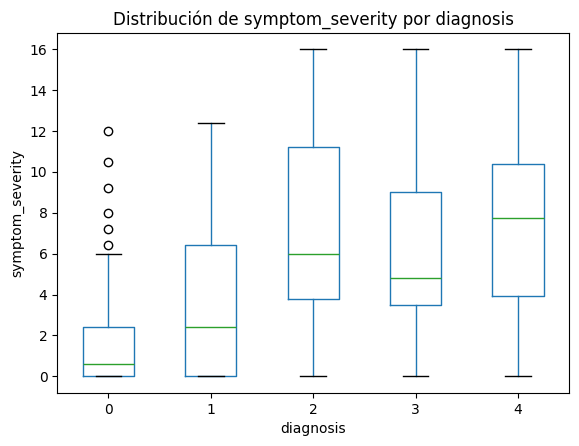

In [65]:
bxp = subset.boxplot(column='symptom_severity', by='diagnosis', grid=False)

plt.title('Distribución de symptom_severity por diagnosis')
plt.suptitle('')
plt.xlabel('diagnosis')
plt.ylabel('symptom_severity')
plt.show()

#### Avg_chol_by_age_group

In [66]:
fig = px.box(subset, y='avg_chol_by_age_group')
fig.show()

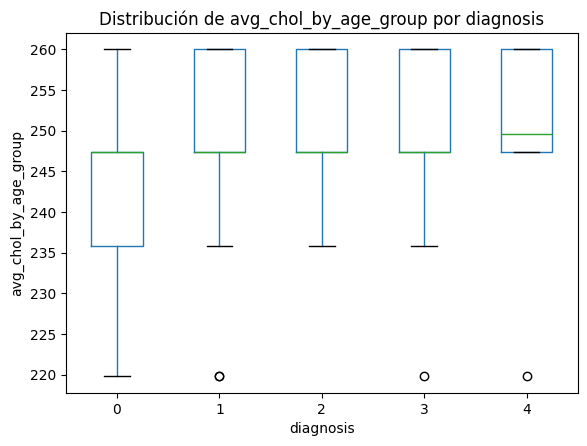

In [67]:
bxp = subset.boxplot(column='avg_chol_by_age_group', by='diagnosis', grid=False)

plt.title('Distribución de avg_chol_by_age_group por diagnosis')
plt.suptitle('')
plt.xlabel('diagnosis')
plt.ylabel('avg_chol_by_age_group')
plt.show()

In [105]:
valor_unicos_age_group = subset['age_group'].unique()
vu_chol =  subset['cholesterol_level'].unique()
vu_bp = subset['blood_pressure_level'].unique()

C:\Users\ignac\AppData\Local\Temp\ipykernel_17520\372916479.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ignac\AppData\Local\Temp\ipykernel_17520\372916479.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ignac\AppData\Local\Temp\ipykernel_17520\372916479.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

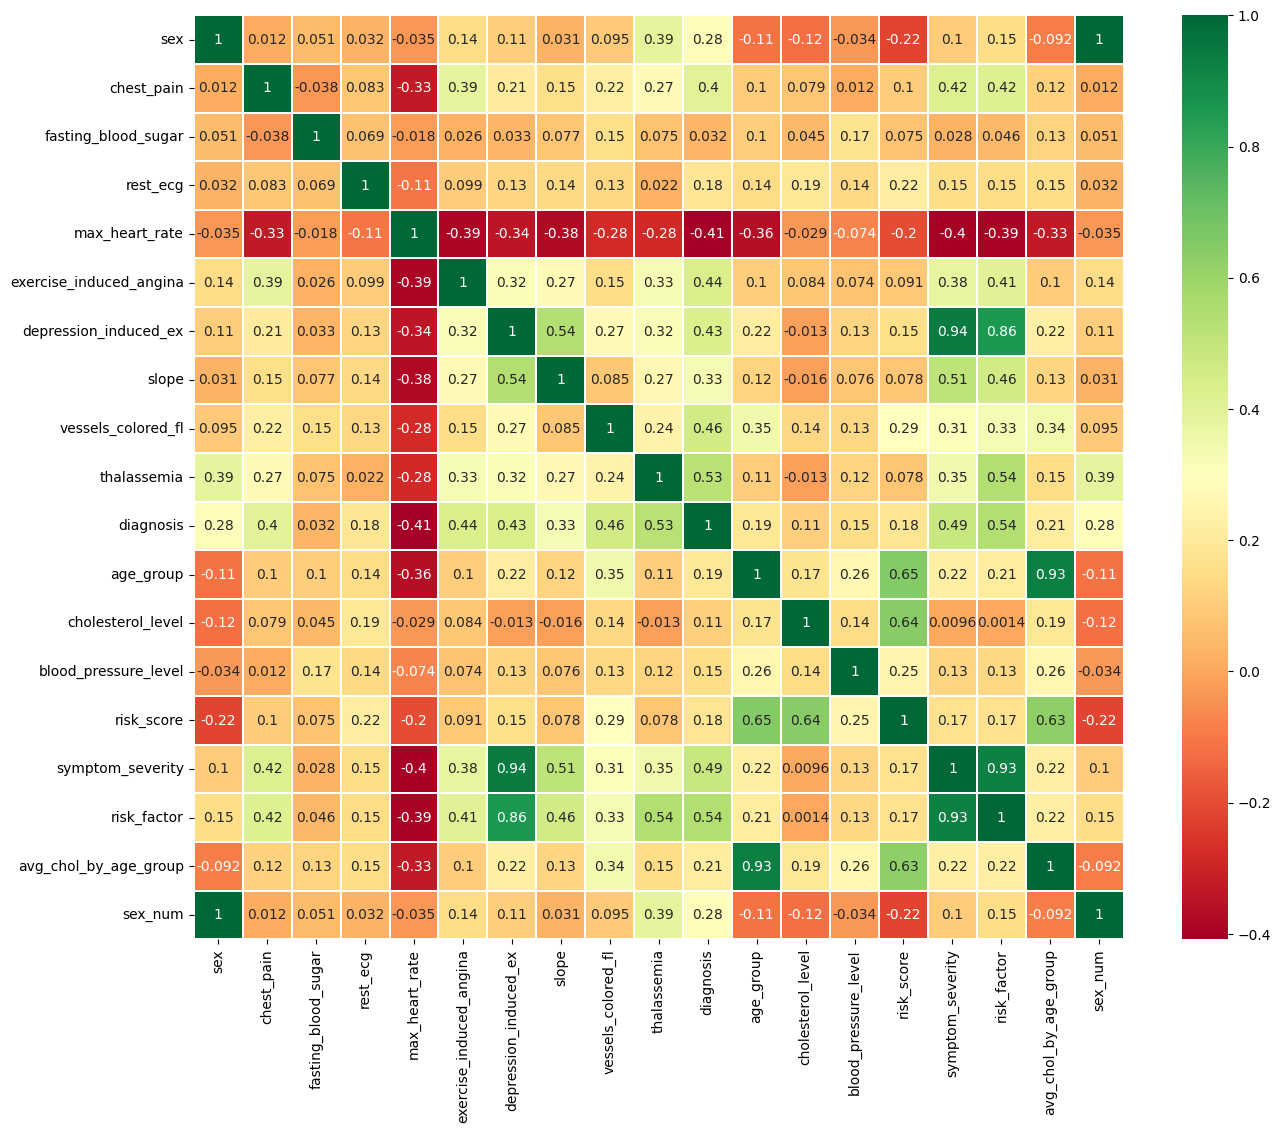

In [108]:
subset["age_group"] = subset.age_group.replace(valor_unicos_age_group, [60, 30, 40, 50, 70])
subset['cholesterol_level'] = subset.cholesterol_level.replace(vu_chol, [1, 2, 0])
subset['blood_pressure_level'] = subset.blood_pressure_level.replace(vu_bp, [2,0,1])
sns.heatmap(subset.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(15, 12)
plt.show()

**Menor relacion con diagnosis**
1. **Max_heart_rate** tiene una baja correlacion con **diagnosis**, que es nuestra variable de salida. Esto nos lleva a entender que max_heart_rate no afecta a la hora de determinar el diagnostico. Además podemos ver que **Max_heart_rate** tiene una baja relación con el resto de variables por lo que nos lleva a pensar de que se pueda eleminar del dataset. 

**Estas son las variables con mayor correlacion con diagnosis**
Consideramos que empieza haber cierta correlacion a partir de 0.40.

1. **chest_pain** 0.4
2. **exercise_induced_angina** 0.44
3. **depression_induced_ex** 0.43
4. **vessel_coloured_fl** 0.46
5. **thalassemia** 0.53
6. **symptom_severity** 0.49
7. **risk_factor** 0.54

**Una vez identificadas estas variables, queremos saber con que otras variables poseen una mayor correlación aparte de diagnosis**
1. **chest_pain**
- risk_factor - 0.42
- symptom_severity - 0.42

2. **exercise_induced_angina**
- risk_factor - 0.41

3. **depression_induced_ex**
- slope - 0.54
- symptom_severity - 0.94
- risk_factor - 0.84

5. **thalassemia**
- risk_factor - 0.54

6. **symptom_severity**
- risk_factor - 0.93
- slope - 0.51
- depression_induced_ex - 0.94
- chest_pain - 0.42

7. **risk_factor**
- symptom_severity - 0.93
- chest_pain - 0.42
- exercise_induced_angina - 0.41
- depression_induced_ex - 0.84
- thalassemia - 0.54

Para el resto de variables que no muestran algun signo de generar una alta influencia en diagnosis, se van a probar con eliminarlas del dataset y evaluar si influye considerablemente en el resultado. 

### Listado de posibles dudas/preguntas al encargado de proveer los datos

1. ¿Que tan fiable son los datos?
2. ¿Por qué hay tantos outliners en las siguientes variables risk_score, risk_factor, symptom_severity y avg_chol_by_age_group? 

## 3- Hipótesis sobre los datos

### a. Formulación de hipótesis sobre la variable target bajo determinadas condiciones

1. En la variable **chest_pain** se piensa que esta puede no influir a la hora de predecir si hay o no alguna enfermedad cardiaca.
2. En la variable **fasting_blood_sugar** se piensa que puede no influir a la hora de predecir si hay o no alguna enfermedad cardiaca. No se termina de saber si al ser true nos asegure que pueda haber algun tipo de enfemerdad cardiaca. 
3. Planteamos que las variables mencionadas como aquellas con mayor relación son las que más van a influir con el resultado final de diagnosis y a su vez, cada una de estas variables estan relacionadas con otras variables que se consideraran importantes a la hora de obtener el diagnosis.
4. **Max_heart_rate** no tiene una correlación con diagnosis, por lo que esta variable no tiene importancia para diagnosis.
 

### b. Comprobación de la hipótesis

### c. Creación de nuevas variables

## 4- Modelado

Dividimos el conjunto de datos en train, validation y test

In [68]:
from sklearn.model_selection import train_test_split

train, not_train = train_test_split(subset, test_size=0.4, random_state=42)
validation, test = train_test_split(not_train, test_size=0.5, random_state=42)

train.shape, validation.shape, test.shape

((178, 18), (59, 18), (60, 18))

Generamos nuestro mapper

In [69]:
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler, OneHotEncoder

mapper = DataFrameMapper([
    (['sex'], [OneHotEncoder()]),
    (['chest_pain'], [StandardScaler()]),
    (['fasting_blood_sugar'], [OneHotEncoder()]),
    (['rest_ecg'], [StandardScaler()]),
    (['max_heart_rate'], [StandardScaler()]),
    (['exercise_induced_angina'], [OneHotEncoder()]),
    (['depression_induced_ex'], [StandardScaler()]),
    (['slope'], [StandardScaler()]),
    (['vessels_colored_fl'], [StandardScaler()]),
    (['thalassemia'], [StandardScaler()]),
    (['age_group'], [OneHotEncoder()]),
    (['cholesterol_level'], [OneHotEncoder()]),
    (['blood_pressure_level'], [OneHotEncoder()]),
    (['risk_score'], [StandardScaler()]),
    (['symptom_severity'], [StandardScaler()]),
    (['risk_factor'], [StandardScaler()]),
    (['avg_chol_by_age_group'], [StandardScaler()])
])

mapper.fit(train)

c:\ML\venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7



DataFrameMapper(drop_cols=[],
                features=[(['sex'], [OneHotEncoder()]),
                          (['chest_pain'], [StandardScaler()]),
                          (['fasting_blood_sugar'], [OneHotEncoder()]),
                          (['rest_ecg'], [StandardScaler()]),
                          (['max_heart_rate'], [StandardScaler()]),
                          (['exercise_induced_angina'], [OneHotEncoder()]),
                          (['depression_induced_ex'], [StandardScaler()]),
                          (['slope'], [StandardScaler()]),
                          (['...red_fl'], [StandardScaler()]),
                          (['thalassemia'], [StandardScaler()]),
                          (['age_group'], [OneHotEncoder()]),
                          (['cholesterol_level'], [OneHotEncoder()]),
                          (['blood_pressure_level'], [OneHotEncoder()]),
                          (['risk_score'], [StandardScaler()]),
                          (['symptom_severity'], [StandardScaler()]),
                          (['risk_factor'], [StandardScaler()]),
                          (['avg_chol_by_age_group'], [StandardScaler()])])

Vemos como realiza las transformaciones

In [70]:
sample = subset.sample(5, random_state=42)

mapper.transform(sample)

array([[ 1.        ,  0.        , -1.2979474 ,  1.        ,  0.        ,
        -1.04016243, -0.53812128,  1.        ,  0.        , -0.89855069,
         0.73480107, -0.69745485, -0.8389694 ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        , -1.51873498,
        -0.80764269, -0.70080725, -1.02776992],
       [ 0.        ,  1.        , -2.37754851,  1.        ,  0.        ,
         0.97232575,  0.53610961,  1.        ,  0.        ,  0.95896669,
         0.73480107, -0.69745485,  1.23514939,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        , -0.65567796,
        -0.30209992, -0.13155692,  0.0409118 ],
       [ 1.        ,  0.        , -0.21834629,  0.        ,  1.        ,
        -1.04016243,  0.89418657,  1.        ,  0.        , -0.89855069,
        -0.96382997, -0.6974

In [71]:
mapper.transformed_names_

['sex_0',
 'sex_1',
 'chest_pain',
 'fasting_blood_sugar_0',
 'fasting_blood_sugar_1',
 'rest_ecg',
 'max_heart_rate',
 'exercise_induced_angina_0',
 'exercise_induced_angina_1',
 'depression_induced_ex',
 'slope',
 'vessels_colored_fl',
 'thalassemia',
 'age_group_0',
 'age_group_1',
 'age_group_2',
 'age_group_3',
 'age_group_4',
 'cholesterol_level_0',
 'cholesterol_level_1',
 'cholesterol_level_2',
 'blood_pressure_level_0',
 'blood_pressure_level_1',
 'blood_pressure_level_2',
 'risk_score',
 'symptom_severity',
 'risk_factor',
 'avg_chol_by_age_group']

Generamos el Pipeline

In [72]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

pipeLR = Pipeline([
    ('mapper', mapper),
    ('classifier', LogisticRegression(random_state=42))
])
# Lo entrenamos con train
pipeLR.fit(train, train.diagnosis)

y_predLR = pipeLR.predict(validation)

y_predLR

c:\ML\venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7



array([0, 3, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 3, 0, 0, 4, 0, 0, 0,
       2, 3, 0, 2, 0, 0, 1, 0, 0, 2, 4, 0, 0, 2, 0], dtype=int64)

Ahora se evaluarán las metricas

In [73]:
from sklearn import metrics

print(metrics.classification_report(validation.diagnosis, y_predLR))

              precision    recall  f1-score   support

           0       0.73      0.97      0.83        31
           1       0.50      0.07      0.12        14
           2       0.10      0.50      0.17         2
           3       0.00      0.00      0.00         8
           4       0.50      0.25      0.33         4

    accuracy                           0.56        59
   macro avg       0.37      0.36      0.29        59
weighted avg       0.54      0.56      0.50        59



Claramente no parece ser un problema para resolver con logisitc regression.

Probaremos con k-NN

In [74]:
from sklearn.neighbors import KNeighborsClassifier

K = 10

pipeKNN = Pipeline([
    ('mapper', mapper),
    ('classifier', KNeighborsClassifier(n_neighbors=K))
])
# Lo entrenamos con train
pipeKNN.fit(train, train.diagnosis)

y_predKNN = pipeKNN.predict(validation)

y_predKNN

c:\ML\venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7



array([0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       3, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0], dtype=int64)

In [75]:
print(metrics.classification_report(validation.diagnosis, y_predKNN))

              precision    recall  f1-score   support

           0       0.68      0.97      0.80        31
           1       0.50      0.07      0.12        14
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         4

    accuracy                           0.53        59
   macro avg       0.24      0.21      0.18        59
weighted avg       0.48      0.53      0.45        59



c:\ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Modificaremos el valor devuelto por 'diagnosis', de manera que tendremos solo dos resultados posibles [0,1]
0: sin enfermedad
1: con enfermedad

In [76]:
subset['diagnosis'] = subset['diagnosis'].apply(lambda x: 1 if x > 1 else x)

subset.diagnosis

C:\Users\ignac\AppData\Local\Temp\ipykernel_17520\4141676929.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: diagnosis, Length: 297, dtype: int64

Realiazamos la sepracion de los datos

In [77]:
train, not_train = train_test_split(subset, test_size=0.4, random_state=42)
validation, test = train_test_split(not_train, test_size=0.5, random_state=42)

Generamos la nueva Pipeline con LogisticRegression y k-NN para comparar

In [78]:
pipeLR = Pipeline([
    ('mapper', mapper),
    ('classifier', LogisticRegression(random_state=42))
])
# Lo entrenamos con train
pipeLR.fit(train, train.diagnosis)

y_predLR_train = pipeLR.predict(train)
y_predLR_validation = pipeLR.predict(validation)

y_predLR_validation

c:\ML\venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7



array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

Evaluamos las metricas

In [79]:
print(metrics.classification_report(validation.diagnosis, y_predLR_validation))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85        31
           1       0.91      0.71      0.80        28

    accuracy                           0.83        59
   macro avg       0.85      0.82      0.83        59
weighted avg       0.84      0.83      0.83        59



Text(0.5, 1.0, 'train')

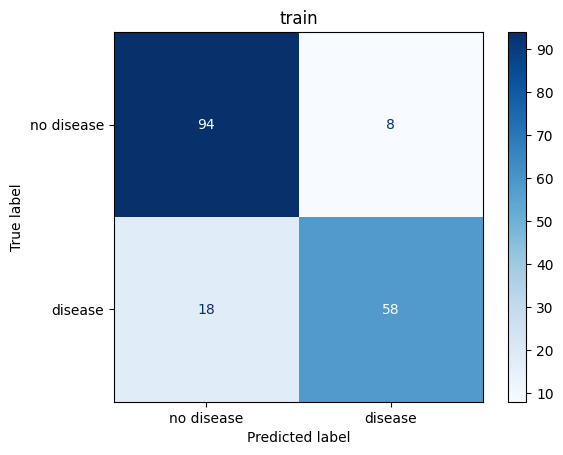

In [80]:
cm = metrics.confusion_matrix(train.diagnosis, y_predLR_train)
cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                        display_labels=['no disease', 'disease'])
cm_plot.plot(cmap="Blues")
cm_plot.ax_.set_title('train')

Text(0.5, 1.0, 'validation')

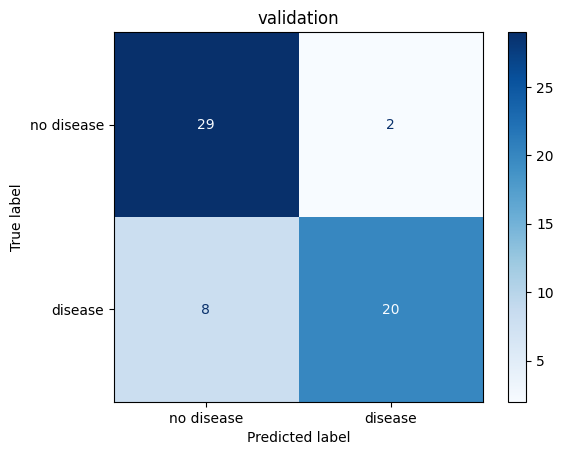

In [81]:
cm = metrics.confusion_matrix(validation.diagnosis, y_predLR_validation)
cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                        display_labels=['no disease', 'disease'])
cm_plot.plot(cmap="Blues")
cm_plot.ax_.set_title('validation')

Con los datos de 'diagnosis' modificados, las predicciones son mas precisas.

In [82]:
K = 10

pipeKNN = Pipeline([
    ('mapper', mapper),
    ('classifier', KNeighborsClassifier(n_neighbors=K))
])
# Lo entrenamos con train
pipeKNN.fit(train, train.diagnosis)

y_predKNN_train = pipeKNN.predict(train)
y_predKNN_validation = pipeKNN.predict(validation)

y_predKNN_validation

c:\ML\venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7



array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [83]:
print(metrics.classification_report(validation.diagnosis, y_predKNN_validation))

              precision    recall  f1-score   support

           0       0.69      0.94      0.79        31
           1       0.88      0.54      0.67        28

    accuracy                           0.75        59
   macro avg       0.79      0.74      0.73        59
weighted avg       0.78      0.75      0.73        59



Text(0.5, 1.0, 'train')

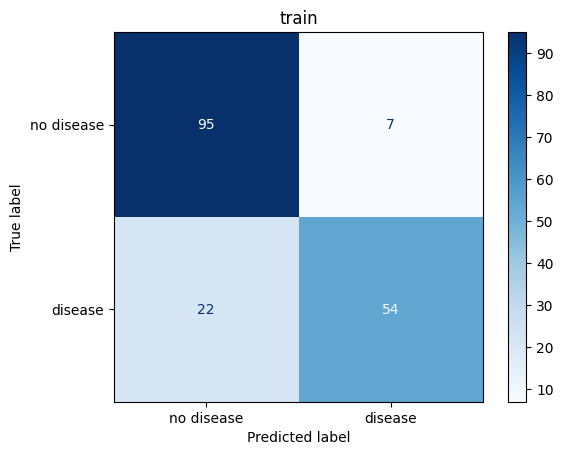

In [84]:
cm = metrics.confusion_matrix(train.diagnosis, y_predKNN_train)
cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                        display_labels=['no disease', 'disease'])
cm_plot.plot(cmap="Blues")
cm_plot.ax_.set_title('train')

Text(0.5, 1.0, 'validation')

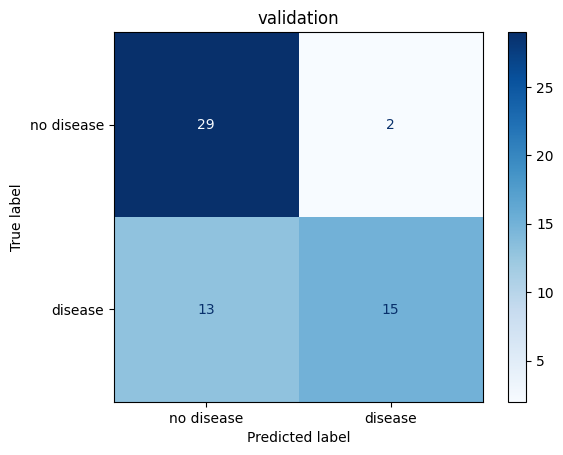

In [85]:
cm = metrics.confusion_matrix(validation.diagnosis, y_predKNN_validation)
cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                        display_labels=['no disease', 'disease'])
cm_plot.plot(cmap="Blues")
cm_plot.ax_.set_title('validation')

Con un KNN con k=10 vemos que es peor que Logistic Regression

In [86]:
from sklearn.model_selection import GridSearchCV

knn_clf = KNeighborsClassifier(n_neighbors=1)
parameters = {'n_neighbors': [1, 3, 5, 10, 15, 20, 50, 100]}

clf = GridSearchCV(knn_clf, parameters, refit=True, verbose=1)

gs_pipe = Pipeline([
    ('mapper', mapper),
    ('classifier', clf),
])

gs_pipe.fit(train, train.diagnosis)

clf.best_score_, clf.best_params_

c:\ML\venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7



Fitting 5 folds for each of 8 candidates, totalling 40 fits


(0.8139682539682539, {'n_neighbors': 15})

In [87]:
K=15

pipeKNN = Pipeline([
    ('mapper', mapper),
    ('classifier', KNeighborsClassifier(n_neighbors=K))
])

pipeKNN.fit(train, train.diagnosis)

kNN_train = pipeKNN.predict(train)
kNN_validation = pipeKNN.predict(validation)

kNN_validation

c:\ML\venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7



array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [88]:
print(metrics.classification_report(validation.diagnosis, kNN_validation))

              precision    recall  f1-score   support

           0       0.72      0.94      0.82        31
           1       0.89      0.61      0.72        28

    accuracy                           0.78        59
   macro avg       0.81      0.77      0.77        59
weighted avg       0.81      0.78      0.77        59



Una vez evaluado el modelo con Logistic Regression y con k-NN con un k=15 vemos que el Logistic Regression tiene una mayor acuracy [LogisticRegression: 83, k-NN: 78]